In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd

In [2]:
df = pd.read_table('Supplementary_Data_2.txt')
df.head(n=5)

,LocusID,Reference,ASM1038v1,ASM1048v1,ASM1326v1,ASM1330v1,ASM14785v3,ASM1484v1,ASM16315v1,ASM16317v1,...,#G,#T,#Indel,#NXdegen,Chromosome,Position,InDupRegion,SampleConsensus,Pattern,Pattern#
0,NC_007779.1::58,G,G,G,G,G,G,G,G,C,...,461,0,0,0,NC_007779.1,58,No,Yes,'111111111112112111111111111111111111111111111...,3
1,NC_007779.1::61,T,T,T,T,T,T,T,T,T,...,0,701,0,0,NC_007779.1,61,No,Yes,'111111111111111111111111111111111111111111111...,5
2,NC_007779.1::64,T,T,T,T,T,T,T,T,C,...,0,460,0,0,NC_007779.1,64,No,Yes,'111111111112112111111111111111111111111111111...,6
3,NC_007779.1::68,A,A,A,A,A,A,A,A,A,...,0,9,0,0,NC_007779.1,68,No,Yes,'111111111111111111111111111111111111111111111...,7
4,NC_007779.1::79,T,T,T,T,T,T,T,T,T,...,5,697,0,0,NC_007779.1,79,No,Yes,'111111111111111111111111111111111111111111111...,8


In [3]:
df.tail(n=5)

,LocusID,Reference,ASM1038v1,ASM1048v1,ASM1326v1,ASM1330v1,ASM14785v3,ASM1484v1,ASM16315v1,ASM16317v1,...,#G,#T,#Indel,#NXdegen,Chromosome,Position,InDupRegion,SampleConsensus,Pattern,Pattern#
225284,NC_007779.1::4646237,C,C,C,C,C,C,C,C,C,...,0,1,0,0,NC_007779.1,4646237,No,Yes,'111111111111111111111111111111111111111111121...,129133
225285,NC_007779.1::4646248,A,A,A,A,A,A,A,A,A,...,10,0,0,0,NC_007779.1,4646248,No,Yes,'111111111111111111111111112111111111111111111...,131362
225286,NC_007779.1::4646257,G,G,G,G,G,G,G,G,G,...,688,0,0,0,NC_007779.1,4646257,No,Yes,'111111111111111111111111111111111111111111111...,131363
225287,NC_007779.1::4646283,A,A,A,A,A,A,A,A,A,...,1,0,0,0,NC_007779.1,4646283,No,Yes,'111111111111111111111111111111111111111111111...,258
225288,NC_007779.1::4646302,C,C,C,C,C,C,C,C,C,...,0,0,0,0,NC_007779.1,4646302,No,Yes,'111111111111111111111111111111111111111111111...,60


In [4]:
df1 = df[['Chromosome','Position','#A','#C','#G','#T']]
df1.head(n=5)

,Chromosome,Position,#A,#C,#G,#T
0,NC_007779.1,58,6,235,461,0
1,NC_007779.1,61,1,0,0,701
2,NC_007779.1,64,0,242,0,460
3,NC_007779.1,68,693,0,0,9
4,NC_007779.1,79,0,0,5,697


In [5]:
def max_count(row):
   if row['#A'] > row['#C'] :
      if row['#A']>row['#G']:
        if row ['#A'] > row['#T']:
         return row['#A']
   if row['#C'] > row['#G']:
    if row['#C'] >row['#T']:
        return row['#C']
   if row ['#G'] > row['#T']:
        return row['#G']
   return row['#T']

In [6]:
df['max_count'] = df.apply (lambda row: max_count (row),axis=1)
df.head(n=5)

,LocusID,Reference,ASM1038v1,ASM1048v1,ASM1326v1,ASM1330v1,ASM14785v3,ASM1484v1,ASM16315v1,ASM16317v1,...,#T,#Indel,#NXdegen,Chromosome,Position,InDupRegion,SampleConsensus,Pattern,Pattern#,max_count
0,NC_007779.1::58,G,G,G,G,G,G,G,G,C,...,0,0,0,NC_007779.1,58,No,Yes,'111111111112112111111111111111111111111111111...,3,461
1,NC_007779.1::61,T,T,T,T,T,T,T,T,T,...,701,0,0,NC_007779.1,61,No,Yes,'111111111111111111111111111111111111111111111...,5,701
2,NC_007779.1::64,T,T,T,T,T,T,T,T,C,...,460,0,0,NC_007779.1,64,No,Yes,'111111111112112111111111111111111111111111111...,6,460
3,NC_007779.1::68,A,A,A,A,A,A,A,A,A,...,9,0,0,NC_007779.1,68,No,Yes,'111111111111111111111111111111111111111111111...,7,693
4,NC_007779.1::79,T,T,T,T,T,T,T,T,T,...,697,0,0,NC_007779.1,79,No,Yes,'111111111111111111111111111111111111111111111...,8,697


In [7]:
df1['max_count'] = df1.apply (lambda row: max_count (row),axis=1)
df1.head(n=5)

C:\Users\Haineycf\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Chromosome,Position,#A,#C,#G,#T,max_count
0,NC_007779.1,58,6,235,461,0,461
1,NC_007779.1,61,1,0,0,701,701
2,NC_007779.1,64,0,242,0,460,460
3,NC_007779.1,68,693,0,0,9,693
4,NC_007779.1,79,0,0,5,697,697


In [9]:
def min_count(row):
    if row['#T'] !=0:
        if row['#T'] != row['max_count']:
            if row['#T'] > row['#G'] or row['#G'] == row['max_count'] :
                if row['#T']>row['#C'] or row['#C'] == row['max_count'] :
                    if row ['#T'] > row['#A'] or row['#A'] == row['max_count']:
                        return row['#T']
    if row['#G'] !=0 : 
        if row['#G'] != row['max_count']:
            if row['#G'] > row['#C']or row['#C']== row['max_count']:
                if row['#G'] > row['#A']or row['#A'] == row['max_count']:
                    return row['#G']
    if row['#C'] !=0 :
        if row['#C'] != row['max_count']:
            if row ['#C'] > row['#A']or row['#A'] == row['max_count']:
                return row['#C']
    if row['#A'] !=0 :
        if row ['#A'] != row['max_count']:
            return row['#A']
    return 999

In [11]:
df1['min_count'] = df1.apply (lambda row: min_count (row),axis=1)
df1.head(n=5)

C:\Users\Haineycf\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Chromosome,Position,#A,#C,#G,#T,max_count,min_count
0,NC_007779.1,58,6,235,461,0,461,235
1,NC_007779.1,61,1,0,0,701,701,1
2,NC_007779.1,64,0,242,0,460,460,242
3,NC_007779.1,68,693,0,0,9,693,9
4,NC_007779.1,79,0,0,5,697,697,5


In [ ]:
df1.describe().transpose()

In [ ]:
plt.hist(df1.min_count)
plt.title("Min Allele")
plt.xlabel("Allele Count")
plt.ylabel("Frequency")
plt.show()

In [ ]:
df2 = df1.query('min_count > 10')
head(df2)

In [ ]:
df2 = df2[df2.min_count != 999]

In [ ]:
df2 = df2.dropna()

In [ ]:
df2.describe().transpose()

In [ ]:
def diversity(row):
   if row['#T'] !=0:
    if row['#T'] != row['max_count']:
     if row['#T'] > row['#G'] or row['#G'] == row['max_count'] :
        if row['#T']>row['#C'] or row['#C'] == row['max_count'] :
         if row ['#T'] > row['#A'] or row['#A'] == row['max_count']:
            return float(row['#T'])/702
   if row['#G'] !=0:
    if row['#G'] != row['max_count']:
     if row['#G'] > row['#C']or row['#C']== row['max_count']:
        if row['#G'] > row['#A']or row['#A'] == row['max_count']:
         return float(row['#G'])/702
   if row['#C'] !=0:
    if row['#C'] != row['max_count']:
     if row ['#C'] > row['#A']or row['#A'] == row['max_count']:
        return float(row['#C'])/702
   if row['#A'] !=0 & row ['#A'] != row['max_count']:
        return float(row['#A'])/702
   return 'NaN'

In [ ]:
# df.to_csv('example.csv')

In [40]:
df2['diversity'] = df2.apply (lambda row: diversity (row),axis=1)
df2.head(n=5)

,Chromosome,Position,#A,#C,#G,#T,max_count,min_count,diversity
0,NC_007779.1,58,6,235,461,0,461,235,0.334758
2,NC_007779.1,64,0,242,0,460,460,242,0.344729
7,NC_007779.1,95,0,0,682,20,682,20,0.028490
8,NC_007779.1,96,0,20,0,682,682,20,0.028490
12,NC_007779.1,393,0,0,487,215,487,215,0.306268


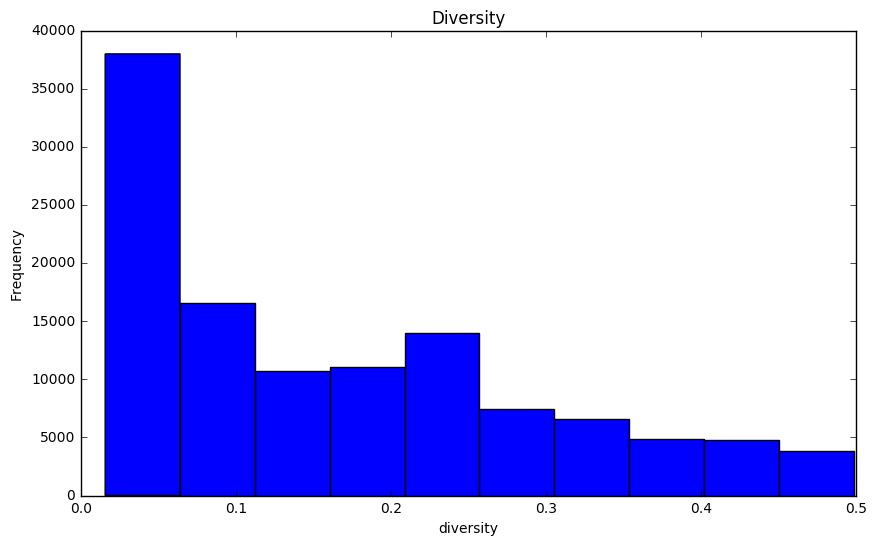

In [41]:
plt.hist(df2.diversity)
plt.title("Diversity")
plt.xlabel("diversity")
plt.ylabel("Frequency")
plt.show()

In [57]:
div100 = pd.Series(df2.diversity).rolling(window=1000).mean()

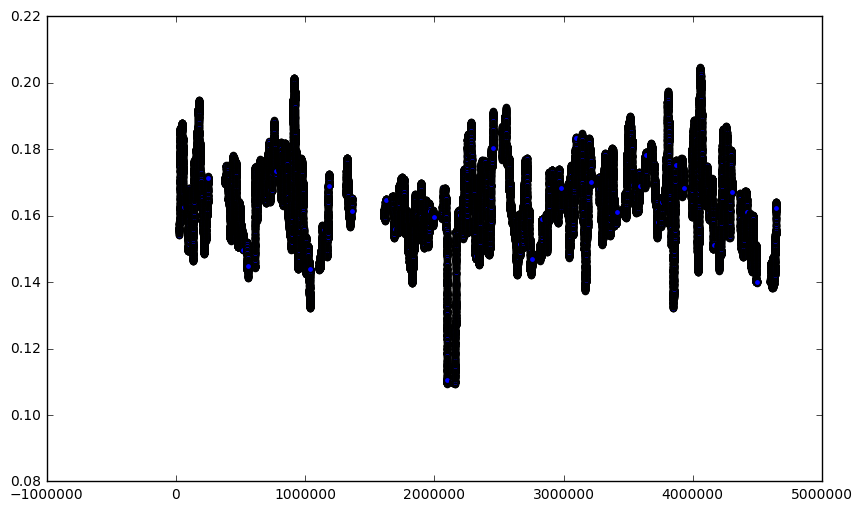

In [58]:
df3=pd.concat([df2.Position, div100], axis=1)
plt.scatter(df3.Position, df3.diversity)
plt.show()

In [ ]:
df.loc[df.reference == 'bad', ['apple', 'banana']] = np.nan

140.4

In [50]:
702*.115

80.73